In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#importing wine datasets
from sklearn import datasets
wines = datasets.load_wine(return_X_y=False, as_frame=False)


**QUESTION 1:**
The dataset has been uploaded.

DATA EXPLORATION

In [54]:
#Exploring data
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [55]:
wines.data.shape

(178, 13)

**QUESTION 2.6:**
The data set contains 178 samples, which is the number that allows us to later determine the dataset was not underfitted.

In [56]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

**QUESTION 2.3:**
The list above shows the dataset's data features e.g alcohol, malic_acid, etc.

In [57]:
type(wines.data), type(wines.target)

(numpy.ndarray, numpy.ndarray)

In [58]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

**QUESTION 2.4 AND 2.5:**
As seen in the array above, the names of the targets are: class_0, class_1 and class_2, which also happens to be the name of the classes in the dataset and each class are placeholders that represent 3 different grape cultivars in the dataset. 

In [59]:
X=wines.data
Y=wines.target
df=pd.DataFrame(X,columns=wines.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**QUESTION 2.1:**
The dataset contains information regarding the characteristics of various wine types in a given factory or cellar. All the values appear to have a numeric value and do not seem to be ordered in any kind of pattern discernible to the naked eye.

Including:
- 13 numercial chemical features
- 1 target label
- 178 wine samples from 3 cultivars

**QUESTION 2.9:**
In the table above the five first elements of the dataset are shown.

In [60]:
#Checking for missing values
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [61]:
#Checking for repeated values
df.duplicated().sum()

np.int64(0)

In [62]:
#Equal distribution test
df['target'] = wines.target 
df.describe()
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

**QUESTION 2.2:**
In order to determine whether the dataset is suitable for supervised learning, the following tests have been applied to it: In the first place the size of the data was checked. Given that there was a sufficient amount of samples so as not to be over or underfitting, we proceeded to assert the quality of the data looking for repeated or missing values, all the tests came back negative, therefore, it was time to perform a balance test in order to make sure the distribution of the data among the different classes was even and, as expected, the results came back positive. Having received all the results, we can confidently state that the dataset is suitable for supervised learning. Supervised learning requires input features(x) and labeled targets(y)

**QUESTION 2.8:**
The table above shows the amount of samples each class in the data set has, this proves that the data set is quite well balanced. Balanced datasets is classifiers trained fairly and imbalanced datasets may model bias toward majority class.

DATASET ORDER

In [63]:
#Correlation test
df.reset_index(inplace=True)
corr = df.corr(numeric_only=True)['index'].sort_values(ascending=False)
print(corr)

index                           1.000000
target                          0.938006
alcalinity_of_ash               0.563955
malic_acid                      0.487630
nonflavanoid_phenols            0.482817
color_intensity                 0.255444
ash                            -0.016086
magnesium                      -0.232275
alcohol                        -0.362844
proanthocyanins                -0.406681
proline                        -0.644330
total_phenols                  -0.650084
hue                            -0.662205
od280/od315_of_diluted_wines   -0.697445
flavanoids                     -0.758609
Name: index, dtype: float64


In [64]:
df['target'].is_monotonic_increasing

True

In [65]:
df['target'].head(20)
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

**QUESTION 2.7:**
In order to see whether any column of the data set followed any kind of order, we implemented a code to calculate the Pearson correlation and, seeing as the column "Target" had the highest correlation (the "level_0" and "index" can be dismissed since they mark the position of the sample in the dataset), we called the "is_monotonic_increasing" function, which returned a TRUE value, which indicates that the samples are ordered in an increased order of that column. Since the "Target" column indicates the class of the sample, it is safe to assume that the samples are mostly ordered by class.
Knowing the order of a given dataset is important when having to split or create training models.

It is also possible to check whether the dataset is ordered by `head(20)` it shows whether the first rows contain only one class which immedieatly reveals if the dataset is grouped by class and `value_counts()` it confirms how many samples per class exist. Combining these it becomes obvious that the first N rows belong to one class followed by another block of rows for the next class.

Ordering matters because train/test split must randomize the data(shuffle), otherwise one class may end up only in the training or testing set.

In [66]:
i = wines.feature_names.index('od280/od315_of_diluted_wines')
wines.feature_names[i] = 'ratio_of_diluted_wines'
df = df.rename(columns={'od280/od315_of_diluted_wines': 'ratio_of_diluted_wines'})
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'ratio_of_diluted_wines',
 'proline']

**QUESTION 2.10:** 
The table above present the code for name changing of the feature od280/od315_of_diluted_wines to ratio_of_diluted_wines

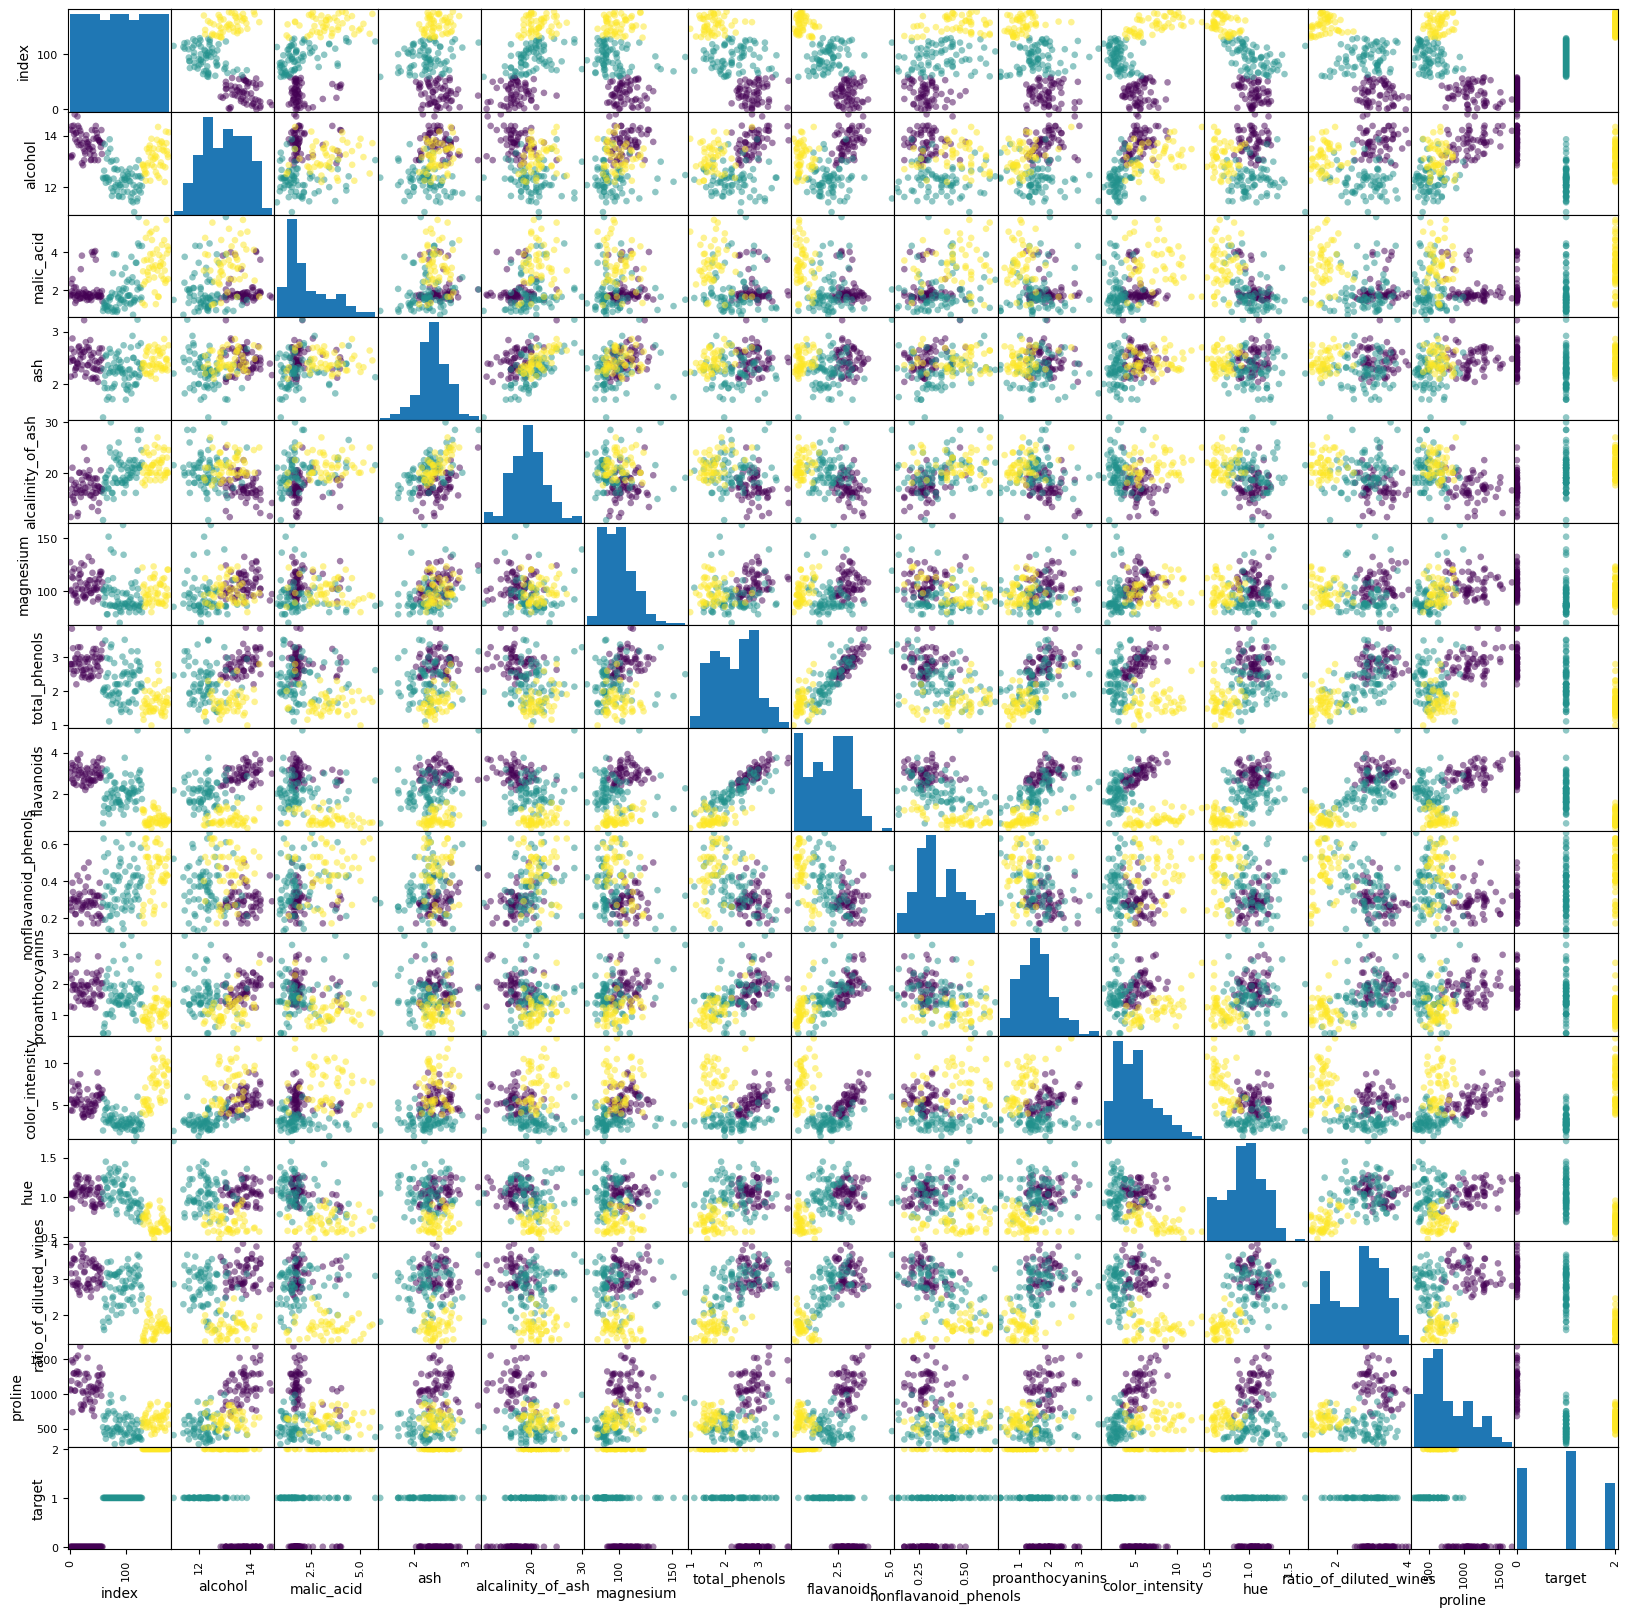

In [67]:
#Scattered matrix
visual=pd.plotting.scatter_matrix(df, figsize=[20,20], c=Y, s=90)

**QUESTION 2.11:**
In the picture above we can observe the scatter matrix for the dataset. Several observations can be made: 
- some feature pairs show clear clustering of the three classes, e.g. features proline, flavanoids, color intensity and hue often show distinct clusters
- other feature pairs show considerable overleap between classes, which means they are not useful of separation
- there are visible correlation between certain features such as flavanoids and total phenols showing positive linear correlation while other pairs such as alcohol and ratio of diluted wines show weaker correlation patterns
- in general, it is clearly visible especially for the class represented by yellow that it forms a distinct cluster compared to purple and blue


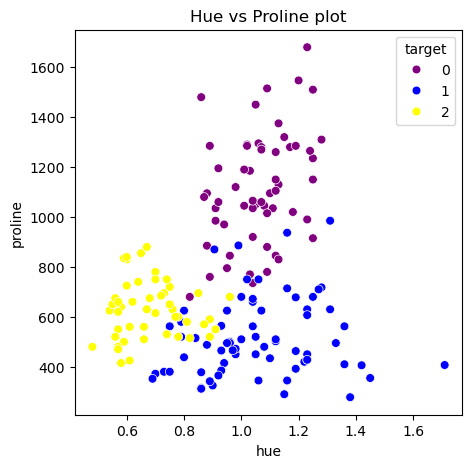

In [68]:
colours=['purple','blue', 'yellow']
plt.figure(figsize=[5,5])
sns.scatterplot(data=df, x='hue', y='proline', hue='target', palette=colours, s=40)
plt.title('Hue vs Proline plot')
plt.show()

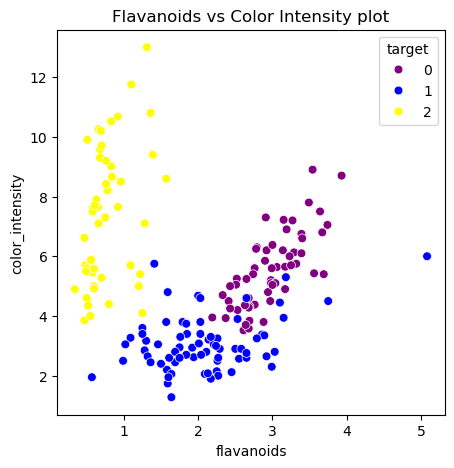

In [69]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df, x='flavanoids', y='color_intensity', hue='target', palette=colours, s=40)
plt.title('Flavanoids vs Color Intensity plot')
plt.show()

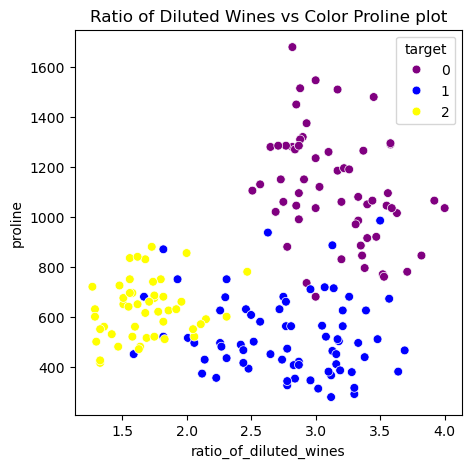

In [70]:
plt.figure(figsize=[5,5])
sns.scatterplot(data=df, x='ratio_of_diluted_wines', y='proline', hue='target', palette=colours, s=40)
plt.title('Ratio of Diluted Wines vs Color Proline plot')
plt.show()

**QUESTION 2.12:**
In the three scatterplots above, we can clearly observe teh visual seperation of the three wine classes: class 0 --> purple, class 1 --> blue, class 2 --> yellow. These three feature pairs were selected because they showed clearest visual seperation of classes (distinct clusters) in the scatter matrix from question 2.11. 

**Plot 1: Hue vs proline**
This pair provides one of the clearest seperations among classes. All three classes form distinct clusters with very little overleap. 

**Plot 2: flavanoids vs color intensity**
Here, class 2 (yellow) is very clearly seprated from the other two classes while classes 1(blue) and 0 (purple) show more overleap but still show distinct clusters between them.

**Plot 3: ratio of diluted wines vs color proline**
The feature pair also shows clear class seperation. Class 2(yellow) and class 0 (purple) do not overleap at all while class 1 (blue) are positioned between them with minimal overlap into the other clusters. 

